# House Prices: Advanced Regression Techniques

### Competition Description

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

Practice Skills:

Creative feature engineering 
Advanced regression techniques like random forest and gradient boosting

Remember:
#### 7 Steps of ML Projects

The 7 Steps below are universal to the majority of Machine Learning / Data Science projects, so this structure can be carried forward to other projects:

1. Frame the Problem and Ideate Potential Solutions
2. Acquire the Data
3. Exploratory Data Analysis (EDA)
4. Data Wrangling
5. Select and Train an ML Algorithm Model
6. Evaluate Results and Fine-Tune Your Model
7. Launch, Monitor, and Maintain Your System

#### Let's get started!

First, let's import the different modules we will likely need:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable
%matplotlib inline

Now let's implrt the training and testing dataframes

In [2]:
train = pd.read_csv('Desktop/Python Files/house-prices-advanced-regression-techniques/train.csv')
challenge = pd.read_csv('Desktop/Python Files/house-prices-advanced-regression-techniques/test.csv')

#test.csv imported as 'challenge' to avoid any onfusion with ML regression later

##### Let's make the `Id` column the index

In [3]:
train.set_index('Id', inplace=True)
challenge.set_index('Id', inplace=True)
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
challenge.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


They appear to have the similar columns, with the exception of the `SalePrice` missing from the `challenge` df. (I could change the pandas default settings to show all columns...)

#### Let's take a deeper look at the `train` data

In [5]:
train.shape

(1460, 80)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Lot's of object columns that will need preperation prior to any ML development.

In [7]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## EDA

### 1. Let's check the null values

Text(0.0, 1, 'Heatmap of Train Null Values')

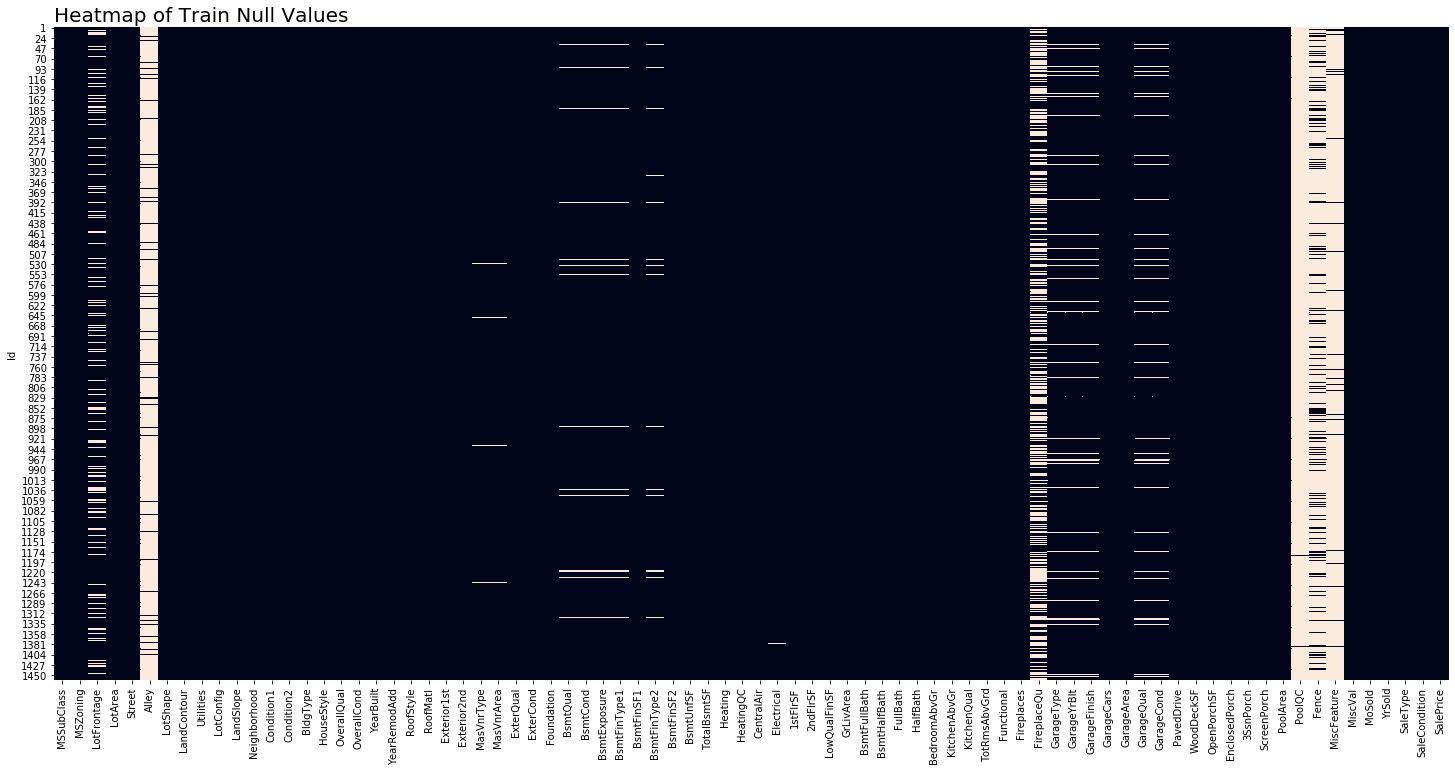

In [8]:
f, ax = plt.subplots(figsize = (25,12))
chart = sns.heatmap(train.isnull(), cbar=False)
ax.set_title('Heatmap of Train Null Values', loc='left', fontdict={"fontsize":20})

In [9]:
# to see ALL 80 columns:
#pd.set_option("max_rows", None) 

percent_null = round(train.isnull().sum() / train.shape[0] * 100, 1)
percent_null.sort_values(ascending=False).head(20)

PoolQC          99.5
MiscFeature     96.3
Alley           93.8
Fence           80.8
FireplaceQu     47.3
LotFrontage     17.7
GarageType       5.5
GarageCond       5.5
GarageFinish     5.5
GarageQual       5.5
GarageYrBlt      5.5
BsmtFinType2     2.6
BsmtExposure     2.6
BsmtQual         2.5
BsmtCond         2.5
BsmtFinType1     2.5
MasVnrArea       0.5
MasVnrType       0.5
Electrical       0.1
RoofMatl         0.0
dtype: float64

What about the combined `train` and `challenge` df?

Let's first create a `combined` df and visualize the values:

In [10]:
combined = pd.concat([train, challenge], axis=0, ignore_index=False)

In [11]:
print(combined.head())
print(combined.shape)

    MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ... 

Text(0.0, 1, 'Heatmap of Combined Null Values')

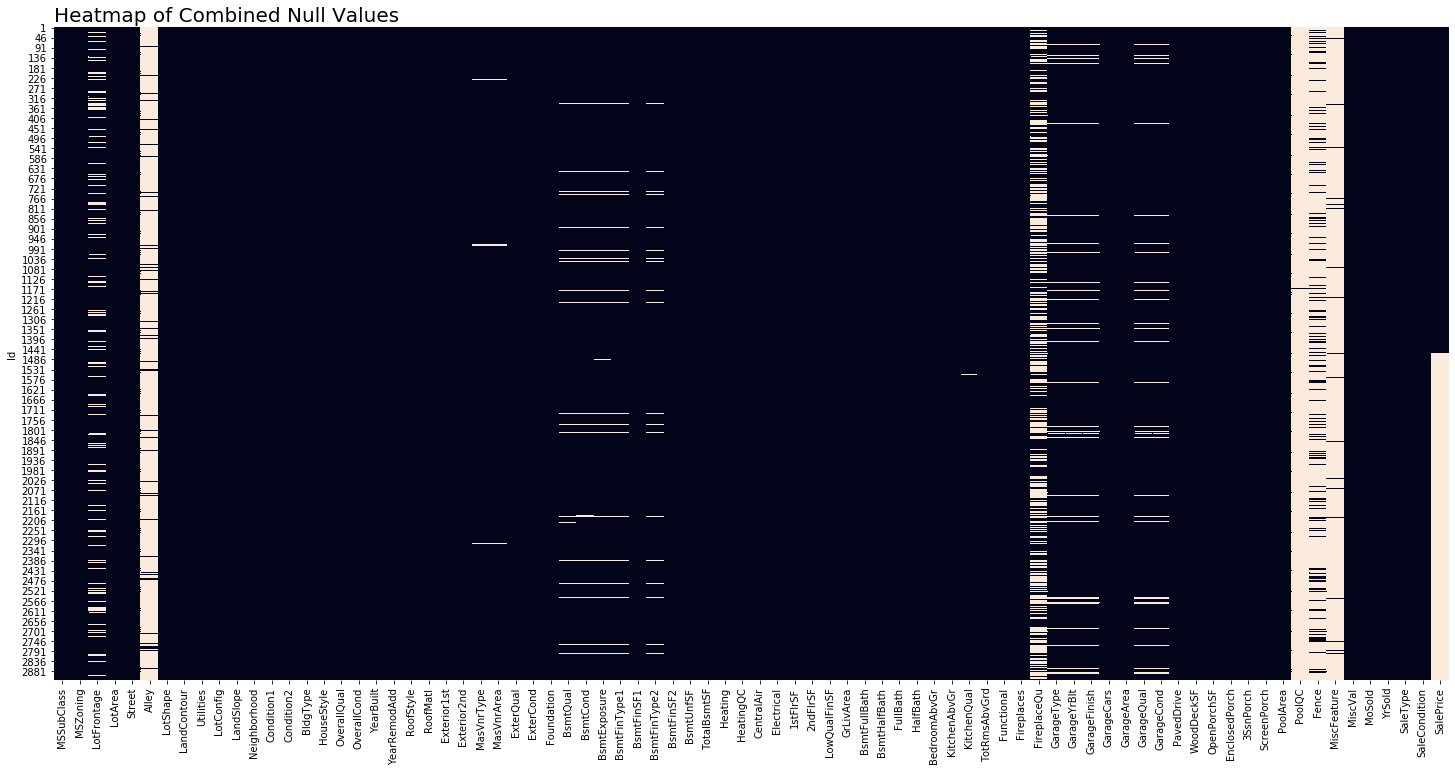

In [12]:
f, ax = plt.subplots(figsize = (25,12))
chart = sns.heatmap(combined.isnull(), cbar=False)
ax.set_title('Heatmap of Combined Null Values', loc='left', fontdict={"fontsize":20})

#### A few of these columns are missing alot of data. I'll need to take a closer look to see if they have any value or if the will need to be removed.

## EDA

In [13]:
train.shape

(1460, 80)

## 1a. Data Visualization with numerical columns 

#### First, let's visualize a correlation of the various columns

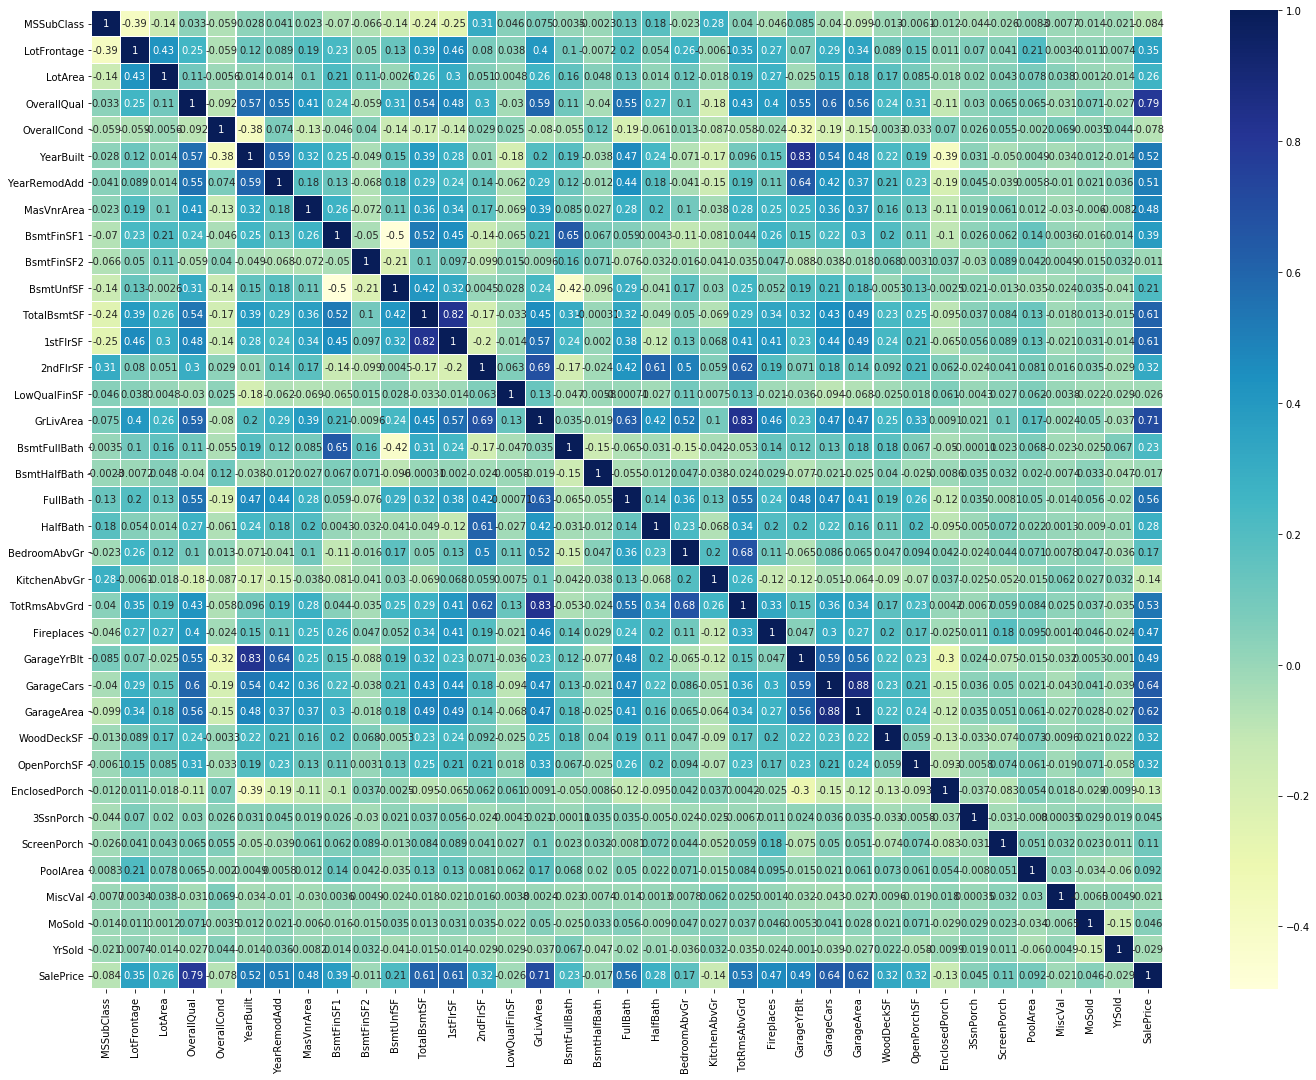

In [14]:
corrmat = train.corr()

f, ax = plt.subplots(figsize =(24, 18)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1, annot = True)

In [15]:
# exploring correlation values for SalePrice (numerical data only)

num_corr = round(corrmat['SalePrice'], 2).sort_values(ascending=False)
num_corr

SalePrice        1.00
OverallQual      0.79
GrLivArea        0.71
GarageCars       0.64
GarageArea       0.62
TotalBsmtSF      0.61
1stFlrSF         0.61
FullBath         0.56
TotRmsAbvGrd     0.53
YearBuilt        0.52
YearRemodAdd     0.51
GarageYrBlt      0.49
MasVnrArea       0.48
Fireplaces       0.47
BsmtFinSF1       0.39
LotFrontage      0.35
2ndFlrSF         0.32
WoodDeckSF       0.32
OpenPorchSF      0.32
HalfBath         0.28
LotArea          0.26
BsmtFullBath     0.23
BsmtUnfSF        0.21
BedroomAbvGr     0.17
ScreenPorch      0.11
PoolArea         0.09
MoSold           0.05
3SsnPorch        0.04
BsmtFinSF2      -0.01
MiscVal         -0.02
BsmtHalfBath    -0.02
LowQualFinSF    -0.03
YrSold          -0.03
OverallCond     -0.08
MSSubClass      -0.08
EnclosedPorch   -0.13
KitchenAbvGr    -0.14
Name: SalePrice, dtype: float64

### Let's drop columns with less than 0.3 

note: we will not need to specify 0.3 and -0.3 as none of the values in our correlation acheive a negative score greater than -0.14

In [16]:
min_value_cols = num_corr < 0.3

low_col_drop = num_corr[min_value_cols].index

train = train.drop(columns=low_col_drop, axis=1)

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   object 
 1   LotFrontage    1201 non-null   float64
 2   Street         1460 non-null   object 
 3   Alley          91 non-null     object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff51ed59ad0>,
      dtype=object)

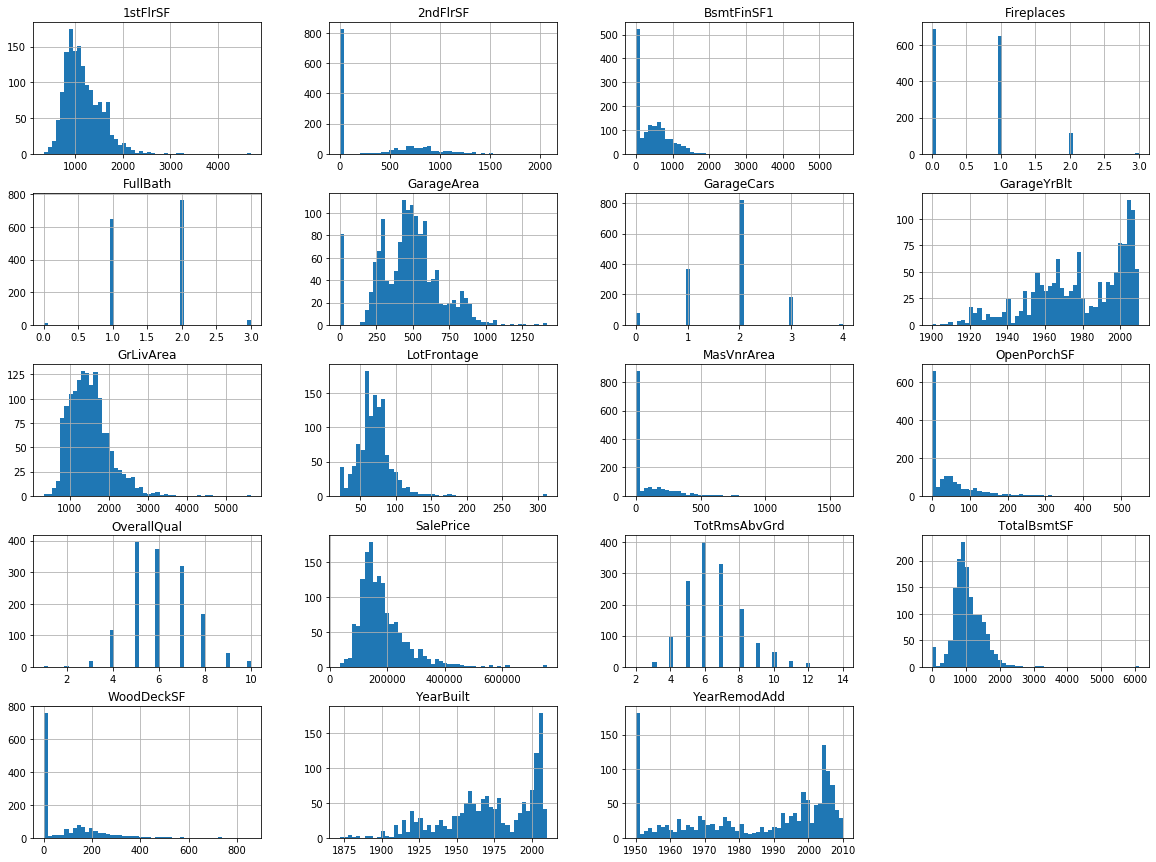

In [18]:
train.hist(bins=50, figsize=(20,15))

In [19]:
num_cols = train.select_dtypes(include=['int64']).columns
num_cols = train[num_cols]
num_cols.describe()

,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1971.267808,1984.865753,443.639726,1057.429452,1162.626712,346.992466,1515.463699,1.565068,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,180921.195890
std,1.382997,30.202904,20.645407,456.098091,438.705324,386.587738,436.528436,525.480383,0.550916,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,79442.502883
min,1.000000,1872.000000,1950.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,5.000000,1954.000000,1967.000000,0.000000,795.750000,882.000000,0.000000,1129.500000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,129975.000000
50%,6.000000,1973.000000,1994.000000,383.500000,991.500000,1087.000000,0.000000,1464.000000,2.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,163000.000000
75%,7.000000,2000.000000,2004.000000,712.250000,1298.250000,1391.250000,728.000000,1776.750000,2.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,214000.000000
max,10.000000,2010.000000,2010.000000,5644.000000,6110.000000,4692.000000,2065.000000,5642.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,755000.000000


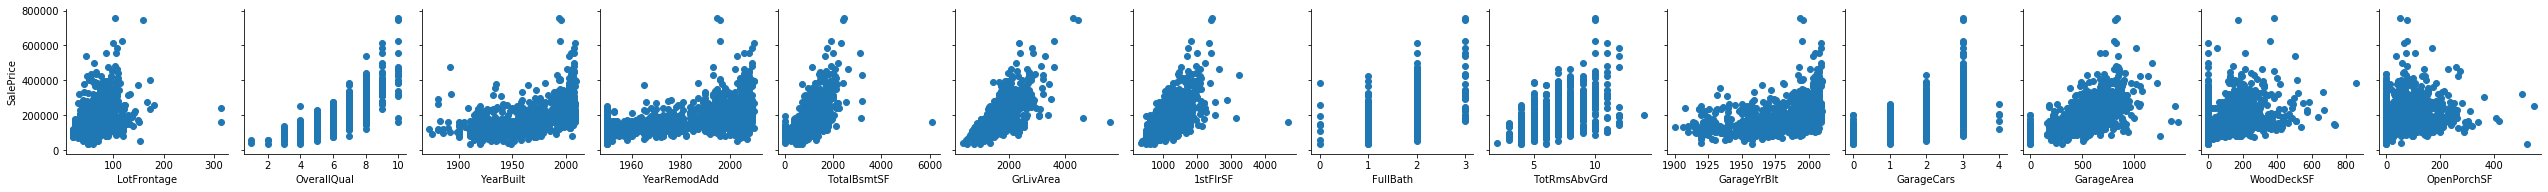

In [20]:
chart = sns.PairGrid(train, y_vars=["SalePrice"], x_vars=['LotFrontage', 'OverallQual', 'YearBuilt',
                                                          'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', '1stFlrSF', 'FullBath',
                                                          'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF'])
chart = chart.map(plt.scatter)

In [21]:
#sns.pairplot(num_cols)

#### Let's have a closer look at the `SalePrice` distribution

Text(0.5, 0, 'Sale Price')

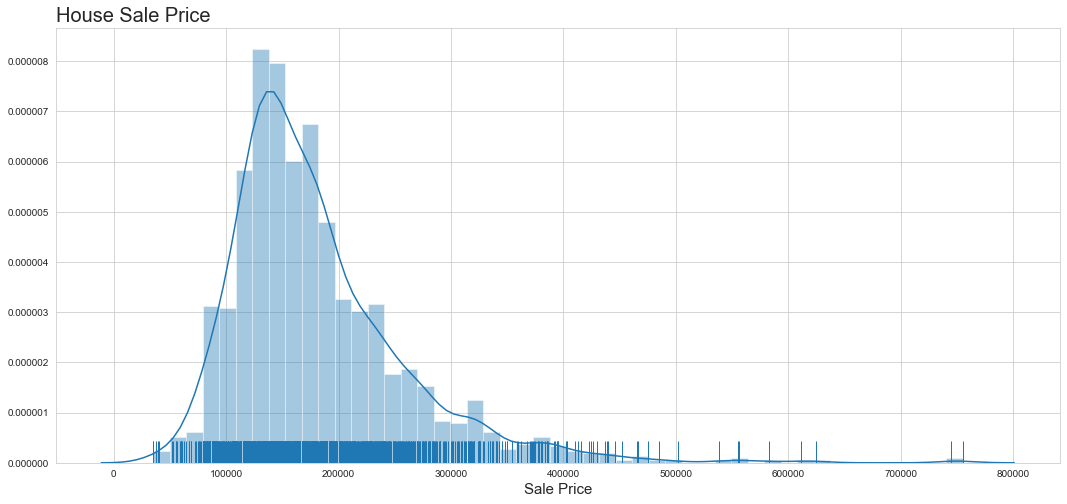

In [22]:
sns.set_style('whitegrid')

f, ax = plt.subplots(figsize=(18,8))
chart = sns.distplot(train['SalePrice'], kde=True, rug=True)
ax.set_title('House Sale Price', loc='left', fontdict={'fontsize':20})
ax.set_xlabel('Sale Price', fontdict={'fontsize':15})

#### One of the highest correlations existed between the `OverallQu` and `SalePrice`, let's see what that looks like:

In [23]:
# we are going to generate alot of boxplots comparing variables against SalePrice--let's create a fundtion for that:

def plot_house(a):
    df = train
    x = train['SalePrice']
    y = train[a]
    f, ax = plt.subplots(figsize=(22,8))
    chart = sns.boxplot(y, x)
    ax.set_title("Sale Price by " + a, loc='left', fontdict={'fontsize':20})


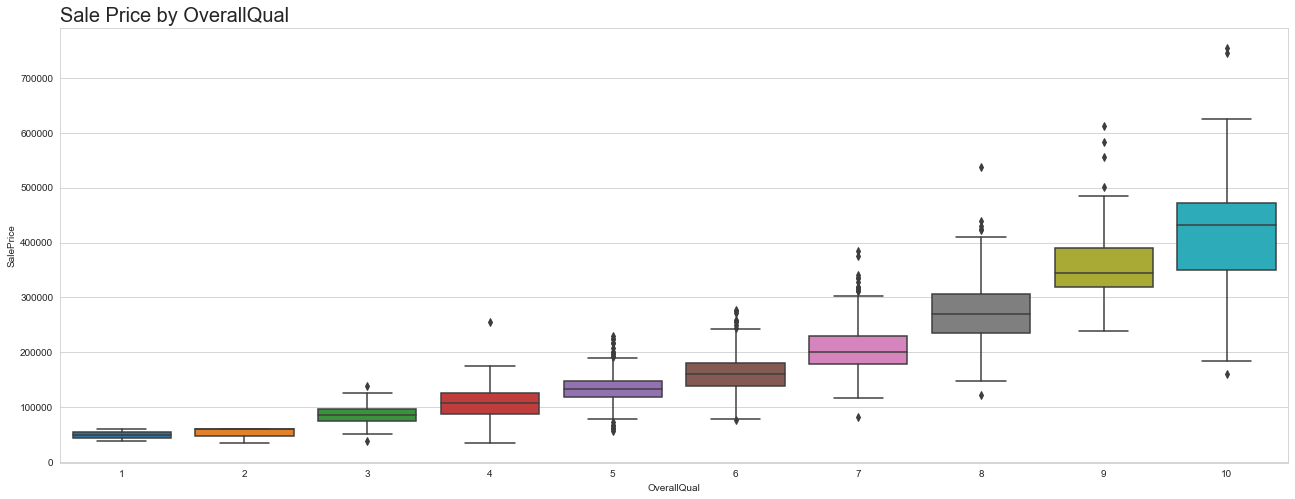

In [24]:
plot_house('OverallQual')

In [25]:
train['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

#### Another high correlated valued was the `GrLivArea`, or "Above grade (ground) living area square feet"

Text(0.5, 0, 'Square feet')

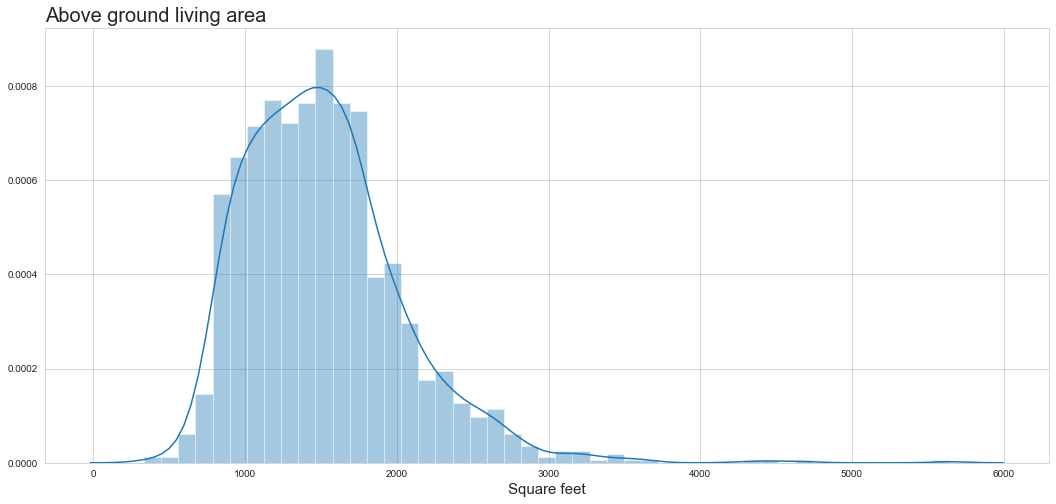

In [26]:
f, ax = plt.subplots(figsize=(18,8))
chart = sns.distplot(train['GrLivArea'])
ax.set_title('Above ground living area', loc='left', fontdict={'fontsize':20})
ax.set_xlabel('Square feet', fontdict={'fontsize':15})

Generate bins for the `GrLivArea` and compare to `SalePrice`?

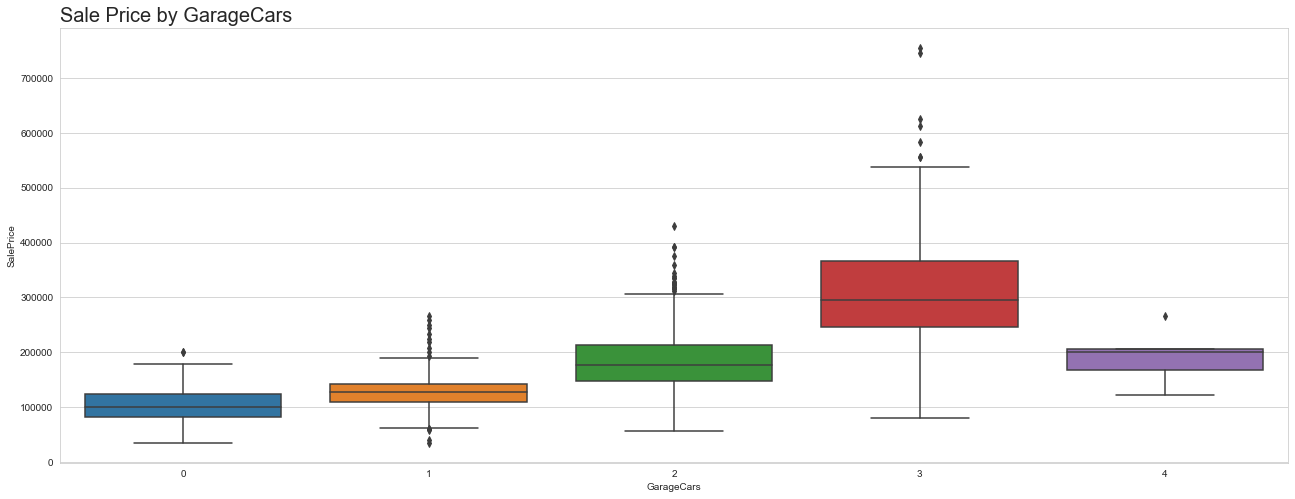

In [27]:
plot_house('GarageCars')

### Let's drop some numerical features that are likely not going to be helpful

In [28]:
num_cols_drop = ['2ndFlrSF', 'MasVnrArea', 'WoodDeckSF', 'OpenPorchSF', 'BsmtFinSF1', 'LotFrontage']

train = train.drop(columns=num_cols_drop)

### What about categorical columns not included in the correlation?

## 1b. Data Visualization with object / categorical columns

In [29]:
train_object_cols = train.select_dtypes(include=['object']).columns
train_object_cols = train[train_object_cols]
train_object_cols.shape

(1460, 43)

In [30]:
pd.set_option("max_columns", None)

train_object_cols.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


#### Here we can see which columns have only a few variables (via the `unique` row) and also how many of the top variable there are. Consider that `Street` has only 2 variables and  "Pave" is 1454/1460 of those. Additionally we can see which columns have very little data (I'm looking at you `PoolQC`)

Let's see which variable we can drop

There are some columns that need a closer look to determine their value. We can then choose to keep, or add to our drop list above.

In [31]:
train['RoofMatl'].value_counts(dropna=False)

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Roll          1
Metal         1
Membran       1
ClyTile       1
Name: RoofMatl, dtype: int64

In [32]:
train['MiscFeature'].value_counts(dropna=False)

NaN     1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

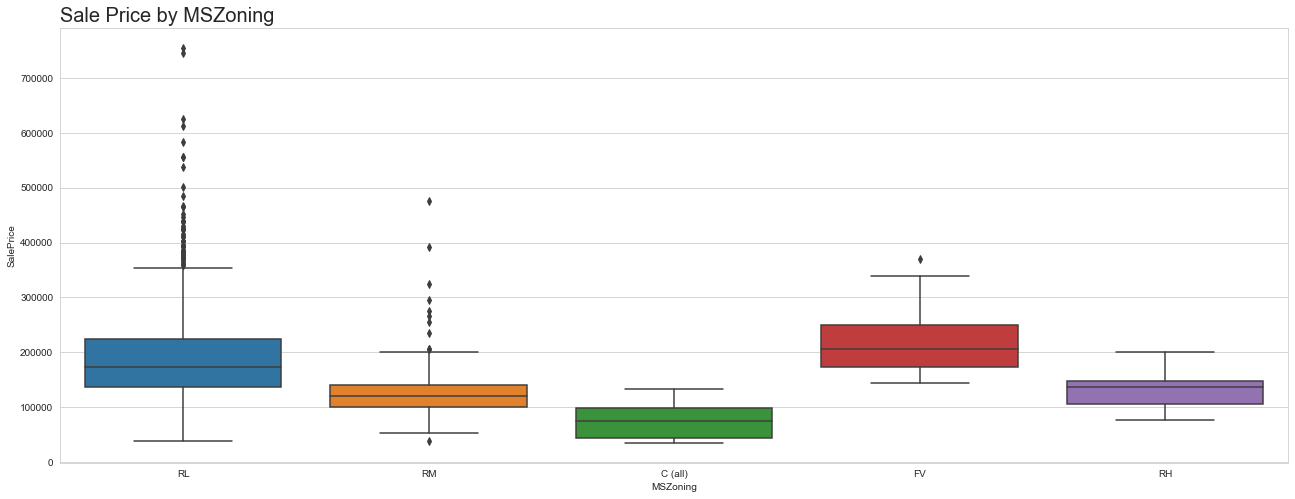

In [33]:
plot_house('MSZoning')

In [34]:
train['Condition1'].value_counts(dropna=False)

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

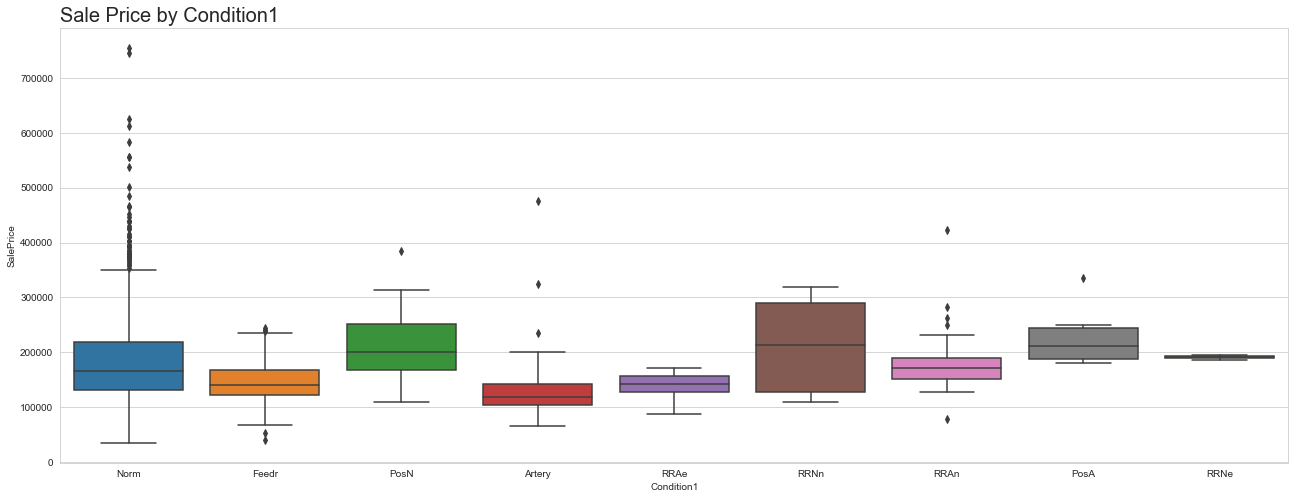

In [35]:
plot_house('Condition1')

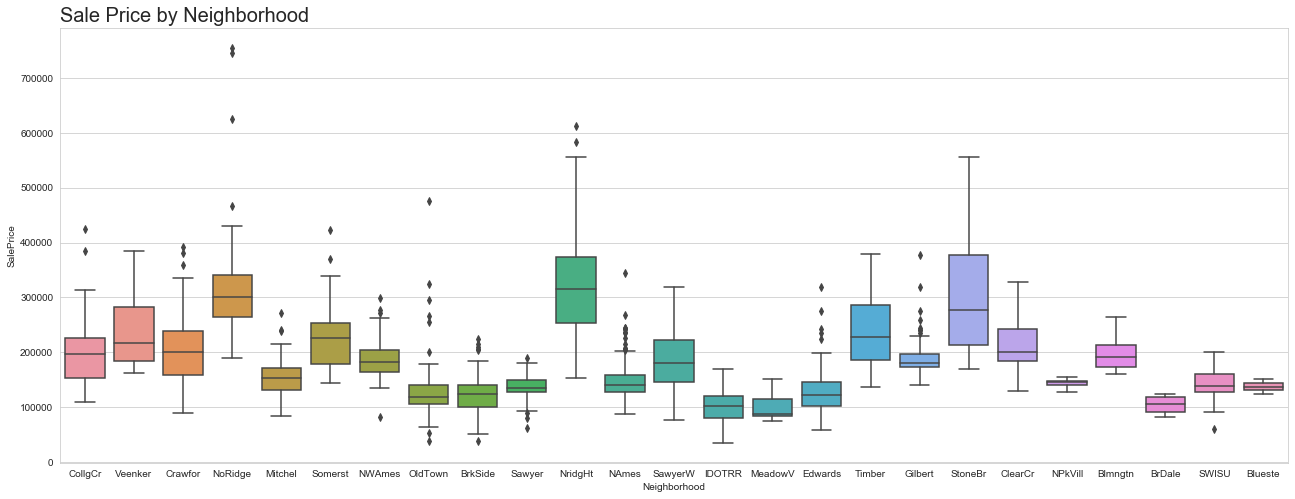

In [36]:
plot_house('Neighborhood')

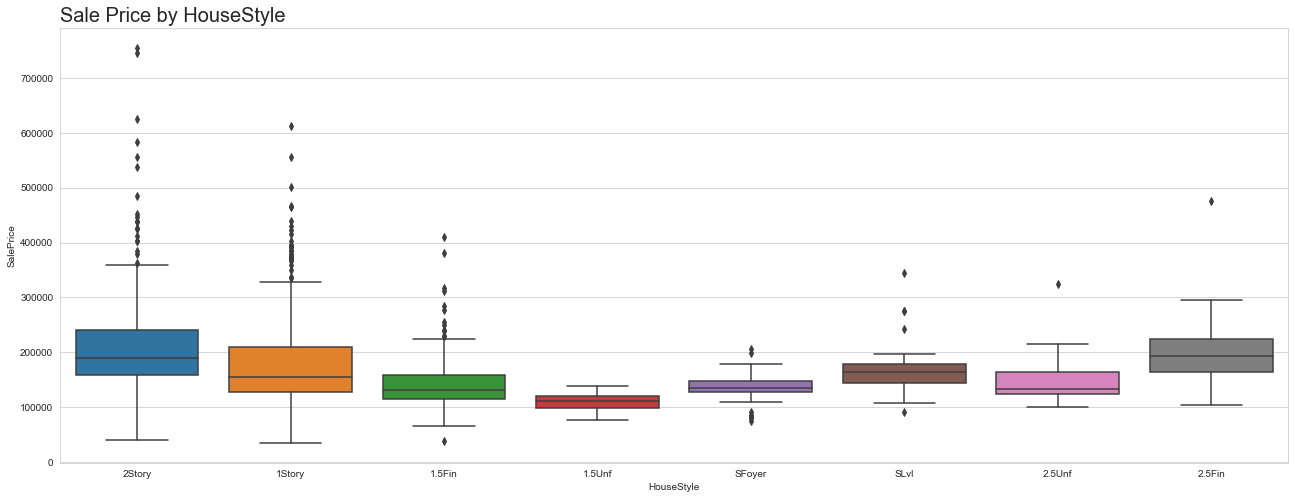

In [37]:
plot_house('HouseStyle')

In [38]:
train['BldgType'].value_counts(dropna=False)

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

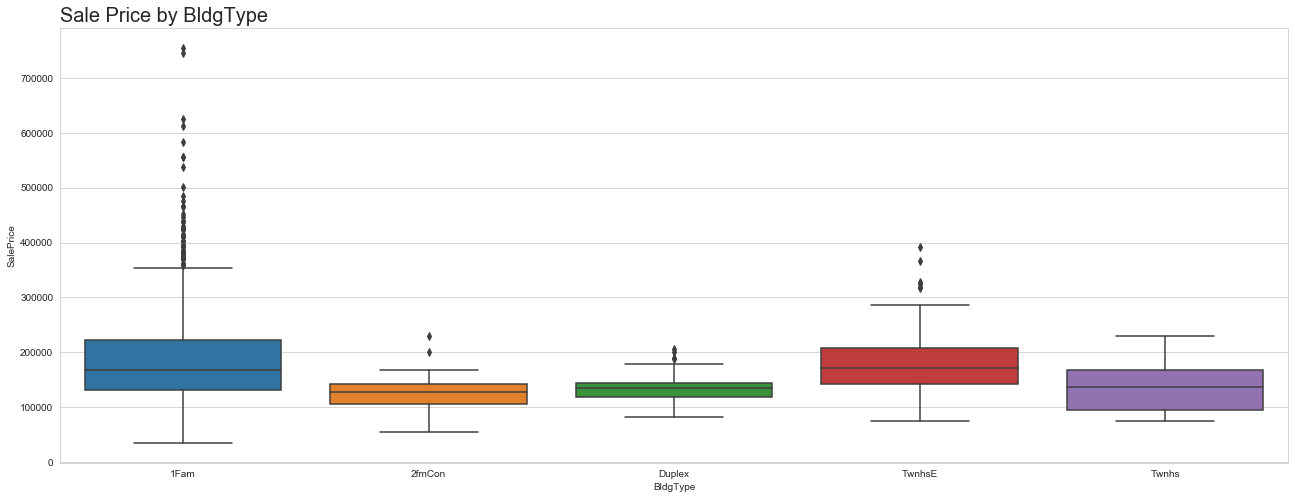

In [39]:
plot_house('BldgType')

In [40]:
train['ExterCond'].value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

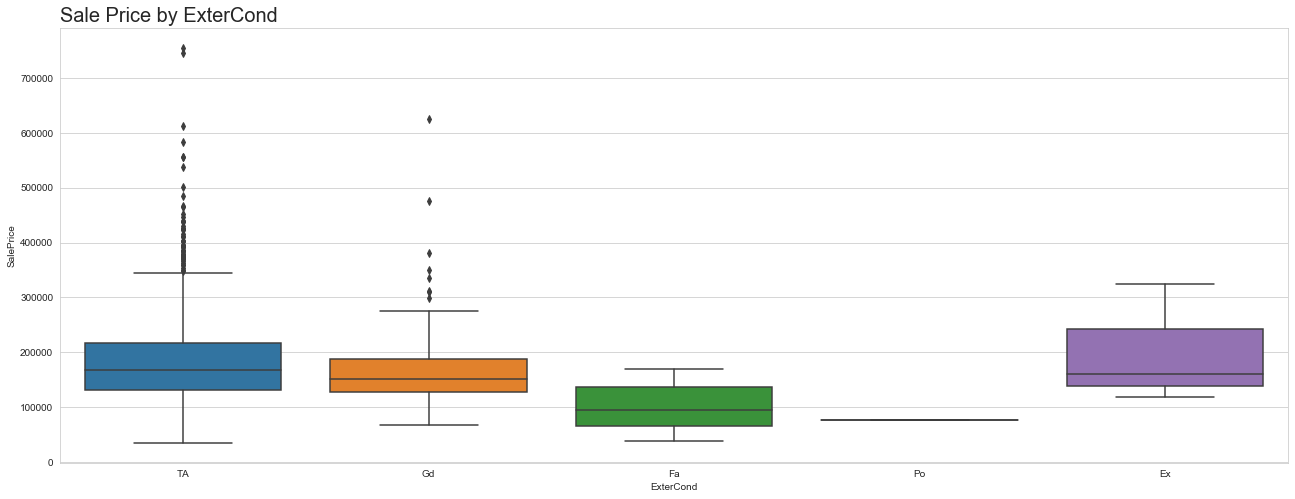

In [41]:
plot_house('ExterCond')

In [42]:
train['Fireplaces'].value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

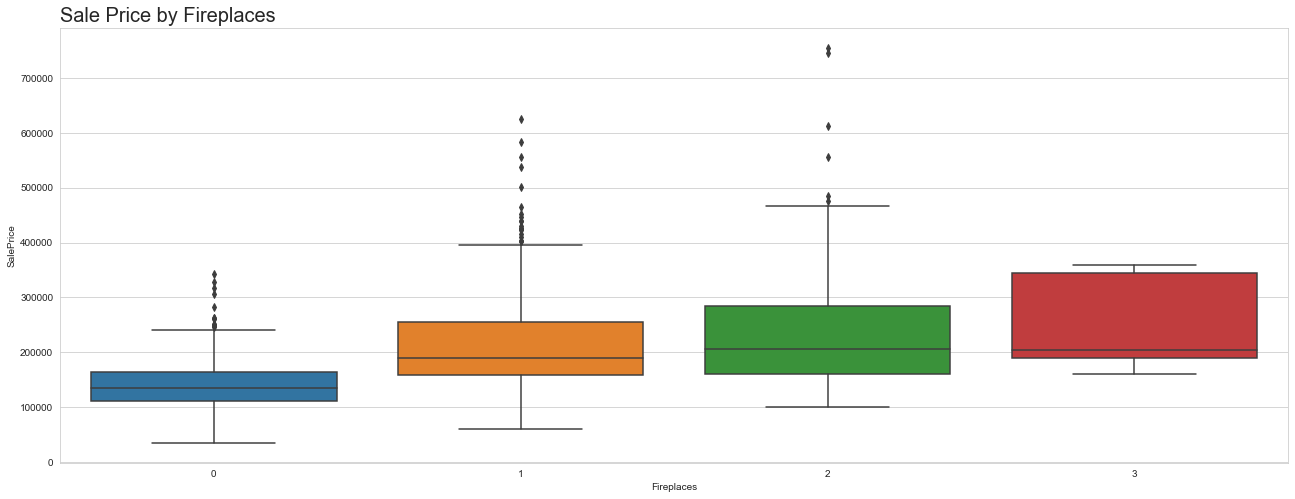

In [43]:
plot_house('Fireplaces')

In [44]:
train['FireplaceQu'].value_counts(dropna=False)

NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

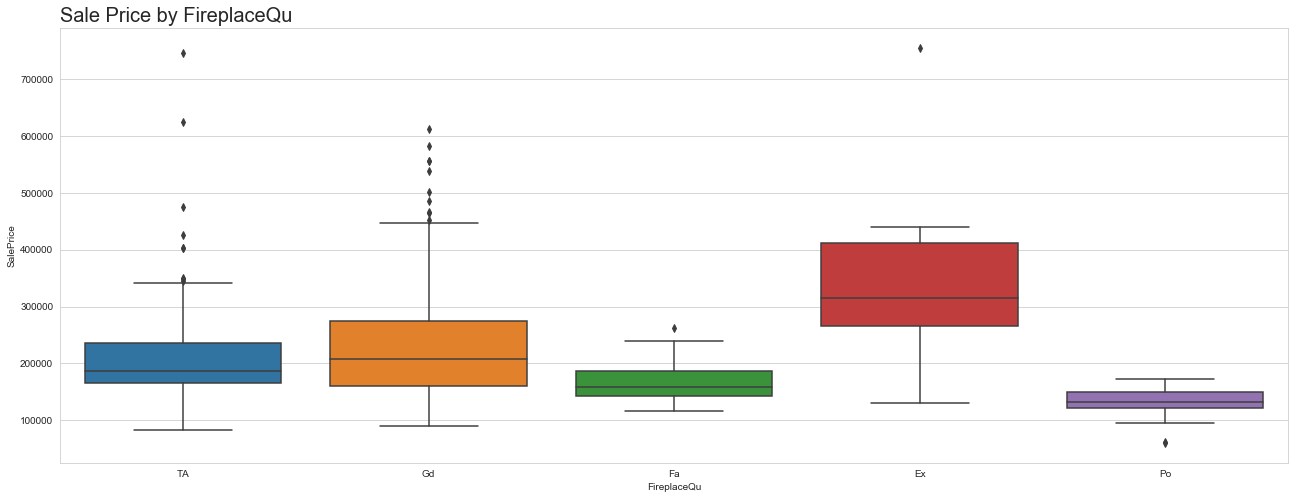

In [45]:
plot_house('FireplaceQu')

In [46]:
train['BsmtQual'].value_counts(dropna=False)

TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int64

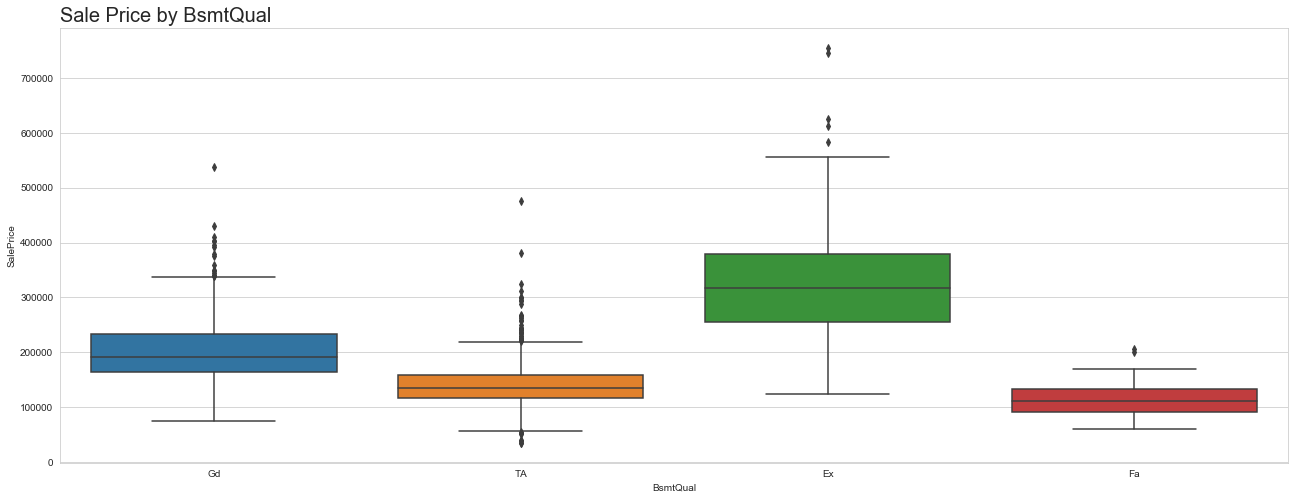

In [47]:
plot_house('BsmtQual')

### Let's drop some unnecessary columns 

In [48]:
cat_cols_drop = ['Street', 'Alley', 'Utilities', 'Condition1', 'Condition2',
                 'RoofMatl', 'Heating', 'BldgType', 'PoolQC', 'Fence', 'MiscFeature',
                 'LandContour', 'LandSlope', 'ExterCond', 'FireplaceQu' ]

In [49]:
train = train.drop(columns=cat_cols_drop)

### Let's see where we stand now

In [50]:
train.shape

(1460, 41)

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 41 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   object 
 1   LotShape       1460 non-null   object 
 2   LotConfig      1460 non-null   object 
 3   Neighborhood   1460 non-null   object 
 4   HouseStyle     1460 non-null   object 
 5   OverallQual    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   RoofStyle      1460 non-null   object 
 9   Exterior1st    1460 non-null   object 
 10  Exterior2nd    1460 non-null   object 
 11  MasVnrType     1452 non-null   object 
 12  ExterQual      1460 non-null   object 
 13  Foundation     1460 non-null   object 
 14  BsmtQual       1423 non-null   object 
 15  BsmtCond       1423 non-null   object 
 16  BsmtExposure   1422 non-null   object 
 17  BsmtFinType1   1423 non-null   object 
 18  BsmtFinT

In [52]:
train.isnull().sum()

MSZoning          0
LotShape          0
LotConfig         0
Neighborhood      0
HouseStyle        0
OverallQual       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
ExterQual         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
TotalBsmtSF       0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
GrLivArea         0
FullBath          0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageCars        0
GarageArea        0
GarageQual       81
GarageCond       81
PavedDrive        0
SaleType          0
SaleCondition     0
SalePrice         0
dtype: int64

## 1c. Correct the null values

Starting with the series of null value specific to`Bsmt`, we can see their is a similar number of NaN. The data dictionary lists na=None


In [53]:
#to refresh:

train['BsmtQual'].value_counts(dropna=False)

TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int64

Let's replace the NaN with `None`. 

In [54]:
train['BsmtQual'] = train['BsmtQual'].fillna('None')

In [55]:
train['BsmtQual'].value_counts(dropna=False)

TA      649
Gd      618
Ex      121
None     37
Fa       35
Name: BsmtQual, dtype: int64

In [56]:
bsmt_cols = ['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
train[bsmt_cols] = train[bsmt_cols].fillna('None')

The other set of missing values in with the `Garage` columns. Again, the missing values relate to homes with no garage.

In [57]:
train['GarageType'].value_counts(dropna=False)

Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

As above, I think this is valuable information, so let's replace the `NaN` with `None`

In [58]:
garage_cols = ['GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond']
train[garage_cols] = train[garage_cols].fillna('None')

garage_zero =['GarageYrBlt','GarageArea' ]
train[garage_zero] = train[garage_zero].fillna(0)

Up next is `MastVnrType`, or "Masonry veneer type". The dictionary lists this as 'None', so lets do that as well.

In [59]:
train['MasVnrType'].value_counts(dropna=False)

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

In [60]:
train['MasVnrType'] = train['MasVnrType'].fillna('None')

Finally, let's tackle that pesky single NaN in `Elecrical`. The data dictionary has nothing on the NaN values, so let's just drop it.

In [61]:
train = train.dropna(subset=['Electrical'])

In [62]:
train['Electrical'].value_counts(dropna=False)

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

I was encountering errors with the length of my updated train data set and the challenge data set post dummies, I think in part to some of the small variables either being included or not into the df. I'm going to simply drop the assiciated columns for now.

In [63]:
# Missing from challenge:
# HouseStyle_2.5Fin
# Exterior1st_CBlock
# Exterior1st_ImStucc
# Exterior1st_Stone
# Exterior2nd_Other
# GarageQual_Fa

drop_annoying = ['HouseStyle', 'Exterior1st', 'Exterior2nd', 'GarageQual', 'Electrical', 'MSZoning', 'Functional']

train = train.drop(columns=drop_annoying)

Let's double check ou null totals:

In [64]:
train.isnull().sum()

LotShape         0
LotConfig        0
Neighborhood     0
OverallQual      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
MasVnrType       0
ExterQual        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
TotalBsmtSF      0
HeatingQC        0
CentralAir       0
1stFlrSF         0
GrLivArea        0
FullBath         0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

In [65]:
train.shape

(1459, 34)

In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1 to 1460
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotShape       1459 non-null   object 
 1   LotConfig      1459 non-null   object 
 2   Neighborhood   1459 non-null   object 
 3   OverallQual    1459 non-null   int64  
 4   YearBuilt      1459 non-null   int64  
 5   YearRemodAdd   1459 non-null   int64  
 6   RoofStyle      1459 non-null   object 
 7   MasVnrType     1459 non-null   object 
 8   ExterQual      1459 non-null   object 
 9   Foundation     1459 non-null   object 
 10  BsmtQual       1459 non-null   object 
 11  BsmtCond       1459 non-null   object 
 12  BsmtExposure   1459 non-null   object 
 13  BsmtFinType1   1459 non-null   object 
 14  BsmtFinType2   1459 non-null   object 
 15  TotalBsmtSF    1459 non-null   int64  
 16  HeatingQC      1459 non-null   object 
 17  CentralAir     1459 non-null   object 
 18  1stFlrSF

### 1d. Remove features not available to ML algorithm pre-sale
This helps prevent overfitting to the training data

In [67]:
col_drop = ['SaleType', 'SaleCondition']

train = train.drop(columns=col_drop)

## 2. Feature Engineering

ML algorithms don't handle NaN or categorical vlaues very well, so we'll need to change all our object types to numerical. We can achive this a few ways:

1. LabelEncoder and OneHotEncoder (from sklearn)
2. DictVectorizer (from sklearn)
3. Pandas get_dummies

pd.get_dummies is liekyl the most straight-forward and returns a df, unlike the sklearn options which return a sparse array. If we had hundreds more columns, or thousands of possible categorical values, get_dummies would not be the best choice.

See https://towardsdatascience.com/encoding-categorical-features-21a2651a065c for more info

In [68]:
# Get dummies
train_updated = pd.get_dummies(train, prefix_sep='_', drop_first=True)

train_updated.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SalePrice,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,7,2003,2003,856,856,1710,2,8,0,2003.0,2,548,208500,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
2,6,1976,1976,1262,1262,1262,2,6,1,1976.0,2,460,181500,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
3,7,2001,2002,920,920,1786,2,6,1,2001.0,2,608,223500,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
4,7,1915,1970,756,961,1717,1,7,1,1998.0,3,642,140000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
5,8,2000,2000,1145,1145,2198,2,9,1,2000.0,3,836,250000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1


In [69]:
train_updated.shape

(1459, 108)

### Split our training data into a training set

Import train_test_split from Sci Kit Learn. This takes our training data and separates it into 2 pieces in order to avoid perfectly fitting the algorithm to the data. Typically around 70%-90% of the data is used to train, and 10%-30% of the data is used to test.

test_size of 0.20 means 20% of the data is reserved for testing.

In [70]:
X = train_updated.drop('SalePrice',axis=1)
y = train_updated['SalePrice']

In [71]:
y.shape

(1459,)

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,y 
                                                    , test_size=0.20, 
                                                    random_state=15)

In [74]:
X.describe()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,6.100069,1971.244003,1984.850583,1057.891021,1162.906785,1515.546950,1.564770,6.517478,0.613434,1868.644962,1.766964,473.030158,0.028101,0.006854,0.633310,0.064428,0.032214,0.002742,0.720356,0.001371,0.010966,0.039753,0.019191,0.102810,0.034955,0.068540,0.054147,0.025360,0.011652,0.033585,0.154215,0.006169,0.050034,0.028101,0.052776,0.077450,0.017135,0.05072,0.040439,0.058944,0.017135,0.025360,0.007539,0.781357,0.007539,0.196025,0.004798,0.001371,0.305003,0.596984,0.087731,0.009596,0.334476,0.620288,0.434544,0.442769,0.01645,0.004112,0.002056,0.023989,0.422892,0.025360,0.444825,0.044551,0.025360,0.001371,0.897875,0.091844,0.078136,0.652502,0.026045,0.101439,0.286498,0.05072,0.025360,0.091158,0.294037,0.022618,0.009596,0.031528,0.026045,0.037012,0.860178,0.033585,0.164496,0.000685,0.293352,0.934887,0.026731,0.400960,0.503770,0.596299,0.013023,0.059630,0.006169,0.265250,0.055517,0.055517,0.289239,0.414668,0.023989,0.006169,0.055517,0.004798,0.908156,0.020562,0.917752


In [75]:
X_train.describe()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y
count,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.00000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000
mean,6.095116,1971.482434,1984.735219,1063.816624,1167.619537,1512.293059,1.567266,6.497001,0.612682,1875.003428,1.768638,473.399314,0.029991,0.006855,0.62982,0.065981,0.035133,0.003428,0.717224,0.001714,0.010283,0.038560,0.020566,0.100257,0.031705,0.069409,0.054841,0.026564,0.011997,0.039417,0.155955,0.004284,0.050557,0.025707,0.056555,0.075407,0.016281,0.050557,0.041131,0.053985,0.016281,0.025707,0.009426,0.779777,0.009426,0.197087,0.004284,0.000857,0.304199,0.592973,0.093402,0.010283,0.331620,0.622965,0.434447,0.447301,0.014567,0.002571,0.002571,0.023136,0.420737,0.024850,0.447301,0.041988,0.024850,0.001714,0.898029,0.095116,0.077978,0.643530,0.025707,0.100257,0.288775,0.052271,0.024850,0.087404,0.297344,0.020566,0.010283,0.036847,0.025707,0.037704,0.856041,0.033419,0.167095,0.000857,0.287061,0.933162,0.030848,0.399314,0.501285,0.601542,0.012853,0.058269,0.005998,0.263925,0.052271,0.052271,0.281919,0.423308,0.023136,0.004284,0.052271,0.004284,0.914310,0.016281,0.919

In [76]:
X_train.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1273,5,1965,1965,935,935,935,1,5,0,1965.0,1,288,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
1397,5,1948,1950,747,1687,1687,1,7,2,1966.0,2,572,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
1,7,2003,2003,856,856,1710,2,8,0,2003.0,2,548,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
165,6,1926,2004,1149,1149,1616,2,5,0,1926.0,1,216,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
4,7,1915,1970,756,961,1717,1,7,1,1998.0,3,642,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1


In [77]:
X_train.shape

(1167, 107)

### 3. Choosing a Machine Learning Model 

This exercise is a supervised, regression model. We could cinsider a linear regression model, Random Forest Reggession, or peraps even other i dont know about yet. Let's start with a Linear Regression.

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Run our algorithm

In [80]:
y_pred_lr = regressor.predict(X_test)

### Evaluate the prediction

First, by comparing the 'Actual' to 'Predicted' values (in this case, the `SalePrice`

In [81]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})
df1 = df.head(25)
df1

,Actual,Predicted
Id,,
1236,138887,164603.520094
449,119500,114851.791531
45,141000,127656.323083
39,109000,127793.770133
1276,137000,166018.411023
470,187000,185526.518398
843,174900,159635.350428
433,122500,126192.739690
633,82500,190187.506901


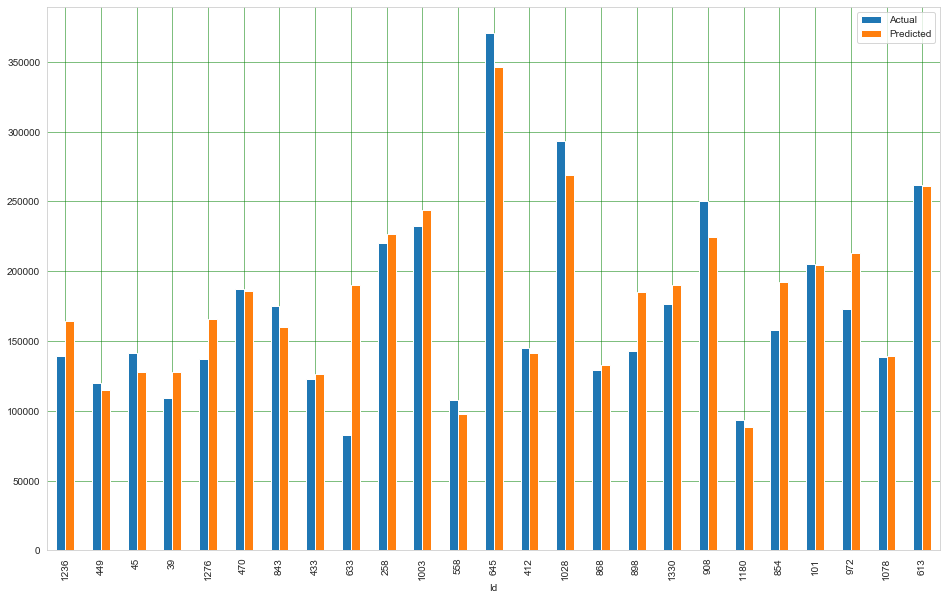

In [82]:
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

We can also evaluate our model performance by reviewing the:

1. 'Root Mean Squared Error' - RMSE. The standard deviation of the errors
2. 'Mean Absolute Error' - AKA the Average Absolute Deviation. Similar to the RMSE, but beter suited for non-normal distributions

In [83]:
from sklearn import metrics

In [84]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lr)) 

Root Mean Squared Error: 43124.43202339223
Mean Absolute Error: 20713.285981718134


### OK, not great.

Let's try a Random Forest Regressor next

In [85]:
from sklearn.ensemble import RandomForestRegressor

In [86]:
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [87]:
y_pred_rfr = forest_reg.predict(X_test)

In [88]:
df_rfr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rfr})
df_rfr = df_rfr.head(25)
df_rfr

,Actual,Predicted
Id,,
1236,138887,144860.50
449,119500,122822.13
45,141000,137816.50
39,109000,133080.92
1276,137000,143933.05
470,187000,187799.00
843,174900,154073.50
433,122500,127209.14
633,82500,186812.91


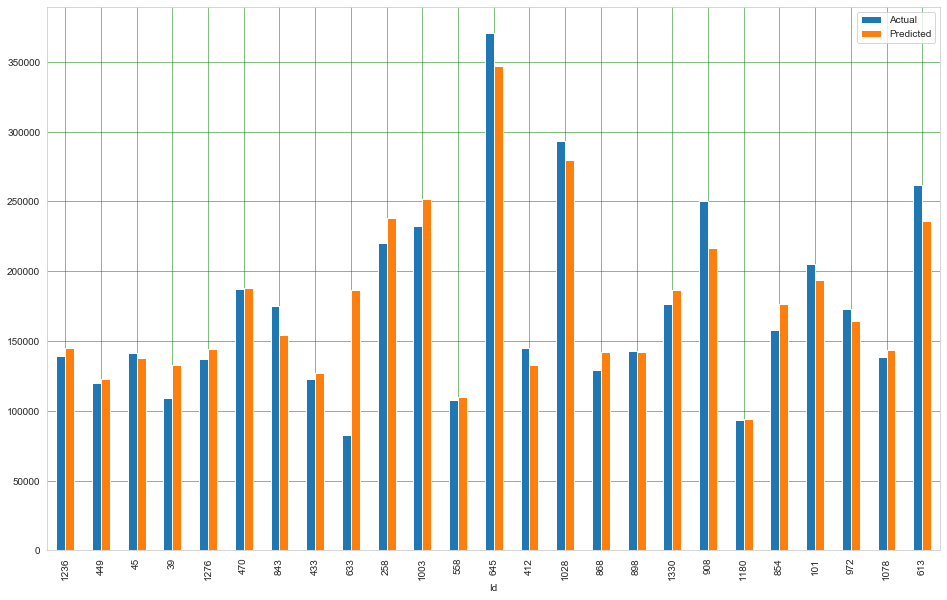

In [89]:
df_rfr.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [90]:
print('Linear Regression Performance:')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lr))
print('')
print('Random Forest Performance:')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfr)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rfr))

Linear Regression Performance:
Root Mean Squared Error: 43124.43202339223
Mean Absolute Error: 20713.285981718134

Random Forest Performance:
Root Mean Squared Error: 32778.61297618693
Mean Absolute Error: 18958.740119863014


#### All in all the Random Forest Model seems to have performed better.

### Time to try it out on the test, or `challenge` dataframe.

First we have to perform the same data wrangling on the test set as the train set.

In [91]:
#drop columns:

col_drop = ['SaleType', 'SaleCondition', 'Street', 'Alley', 'Utilities', 'Condition1', 'Condition2',
                 'RoofMatl', 'Heating', 'BldgType', 'PoolQC', 'Fence', 'MiscFeature',
                 'LandContour', 'LandSlope', 'ExterCond', 'FireplaceQu', '2ndFlrSF', 'MasVnrArea',
            'WoodDeckSF', 'OpenPorchSF', 'BsmtFinSF1', 'LotFrontage']

challenge = challenge.drop(columns=col_drop)

In [92]:
challenge.isnull().sum()

MSSubClass        0
MSZoning          4
LotArea           0
LotShape          0
LotConfig         0
Neighborhood      0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
Exterior1st       1
Exterior2nd       1
MasVnrType       16
ExterQual         0
Foundation        0
BsmtQual         44
BsmtCond         45
BsmtExposure     44
BsmtFinType1     42
BsmtFinType2     42
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      2
BsmtHalfBath      2
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       1
TotRmsAbvGrd      0
Functional        2
Fireplaces        0
GarageType       76
GarageYrBlt      78
GarageFinish     78
GarageCars        1
GarageArea        1
GarageQual       78
GarageCond       78
PavedDrive        0
EnclosedPorch     0


In [93]:
challenge['MasVnrType'] = challenge['MasVnrType'].fillna('None')

In [94]:
challenge['GarageArea'] = challenge['GarageArea'].apply(pd.to_numeric)
challenge['GarageYrBlt'] = challenge['GarageYrBlt'].apply(pd.to_numeric)


In [95]:
garage_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
challenge[garage_cols] = challenge[garage_cols].fillna('None')

garage_zero =['GarageYrBlt','GarageArea', 'GarageCars' ]
challenge[garage_zero] = challenge[garage_zero].fillna(0)

In [96]:
bsmt_cols = ['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual']
challenge[bsmt_cols] = challenge[bsmt_cols].fillna('None')
challenge['TotalBsmtSF'] = challenge['TotalBsmtSF'].fillna(0)

In [97]:
train['KitchenQual'].value_counts()

TA    735
Gd    585
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [98]:

challenge['KitchenQual'] = challenge['KitchenQual'].fillna('TA')

In [99]:
challenge = challenge.drop(columns=low_col_drop, axis=1) #our low correlation scored columns

In [100]:
challenge = challenge.drop(columns=drop_annoying)

In [101]:
challenge.isnull().sum().sort_values(ascending=False).head(10)

PavedDrive      0
BsmtFinType2    0
LotConfig       0
Neighborhood    0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
MasVnrType      0
ExterQual       0
dtype: int64

In [102]:
challenge.shape

(1459, 31)

In [103]:
challenge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotShape      1459 non-null   object 
 1   LotConfig     1459 non-null   object 
 2   Neighborhood  1459 non-null   object 
 3   OverallQual   1459 non-null   int64  
 4   YearBuilt     1459 non-null   int64  
 5   YearRemodAdd  1459 non-null   int64  
 6   RoofStyle     1459 non-null   object 
 7   MasVnrType    1459 non-null   object 
 8   ExterQual     1459 non-null   object 
 9   Foundation    1459 non-null   object 
 10  BsmtQual      1459 non-null   object 
 11  BsmtCond      1459 non-null   object 
 12  BsmtExposure  1459 non-null   object 
 13  BsmtFinType1  1459 non-null   object 
 14  BsmtFinType2  1459 non-null   object 
 15  TotalBsmtSF   1459 non-null   float64
 16  HeatingQC     1459 non-null   object 
 17  CentralAir    1459 non-null   object 
 18  1stFlrSF      1459 non-nu

I had some challenge with the get_dummies and it turns out that some of the `challenge` columns that are int are coded as object

In [104]:
challenge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotShape      1459 non-null   object 
 1   LotConfig     1459 non-null   object 
 2   Neighborhood  1459 non-null   object 
 3   OverallQual   1459 non-null   int64  
 4   YearBuilt     1459 non-null   int64  
 5   YearRemodAdd  1459 non-null   int64  
 6   RoofStyle     1459 non-null   object 
 7   MasVnrType    1459 non-null   object 
 8   ExterQual     1459 non-null   object 
 9   Foundation    1459 non-null   object 
 10  BsmtQual      1459 non-null   object 
 11  BsmtCond      1459 non-null   object 
 12  BsmtExposure  1459 non-null   object 
 13  BsmtFinType1  1459 non-null   object 
 14  BsmtFinType2  1459 non-null   object 
 15  TotalBsmtSF   1459 non-null   float64
 16  HeatingQC     1459 non-null   object 
 17  CentralAir    1459 non-null   object 
 18  1stFlrSF      1459 non-nu

In [105]:
challenge_updated = pd.get_dummies(challenge, prefix_sep='_', drop_first=True)

challenge_updated.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,5,1961,1961,882.0,896,896,1,5,0,1961.0,1.0,730.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
1462,6,1958,1958,1329.0,1329,1329,1,6,0,1958.0,1.0,312.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
1463,5,1997,1998,928.0,928,1629,2,6,1,1997.0,2.0,482.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1464,6,1998,1998,926.0,926,1604,2,7,1,1998.0,2.0,470.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1465,8,1992,1992,1280.0,1280,1280,2,5,0,1992.0,2.0,506.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1


In [106]:
X_train.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1273,5,1965,1965,935,935,935,1,5,0,1965.0,1,288,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
1397,5,1948,1950,747,1687,1687,1,7,2,1966.0,2,572,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
1,7,2003,2003,856,856,1710,2,8,0,2003.0,2,548,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
165,6,1926,2004,1149,1149,1616,2,5,0,1926.0,1,216,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
4,7,1915,1970,756,961,1717,1,7,1,1998.0,3,642,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1


Missing from challenge:
HouseStyle_2.5Fin
Exterior1st_CBlock
Exterior1st_ImStucc
Exterior1st_Stone
Exterior2nd_Other
GarageQual_Fa

In [107]:
challenge_updated.shape

(1459, 107)

In [108]:
predict_challenge=forest_reg.predict(challenge_updated)
predict_challenge

array([122346.66, 149572.9 , 174451.32, ..., 151728.23, 107916.  ,
       229718.46])

In [109]:
predictdf = pd.DataFrame(predict_challenge)
predictdf.head()

,0
0,122346.66
1,149572.90
2,174451.32
3,186298.50
4,200684.73


In [110]:
predictdf = predictdf.rename(columns={0:"SalePrice"})
predictdf.head()

,SalePrice
0,122346.66
1,149572.90
2,174451.32
3,186298.50
4,200684.73


In [111]:
predictdf['Id'] = challenge.index
predictdf.set_index('Id', inplace=True)
predictdf

,SalePrice
Id,
1461,122346.66
1462,149572.90
1463,174451.32
1464,186298.50
1465,200684.73
...,...
2915,85665.00
2916,86664.61
2917,151728.23


In [112]:
results = pd.concat([challenge, predictdf], axis=1)

In [113]:
results.head()

,LotShape,LotConfig,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageCond,PavedDrive,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,Reg,Inside,NAmes,5,1961,1961,Gable,None,TA,CBlock,TA,TA,No,Rec,LwQ,882.0,TA,Y,896,896,1,TA,5,0,Attchd,1961.0,Unf,1.0,730.0,TA,Y,122346.66
1462,IR1,Corner,NAmes,6,1958,1958,Hip,BrkFace,TA,CBlock,TA,TA,No,ALQ,Unf,1329.0,TA,Y,1329,1329,1,Gd,6,0,Attchd,1958.0,Unf,1.0,312.0,TA,Y,149572.90
1463,IR1,Inside,Gilbert,5,1997,1998,Gable,None,TA,PConc,Gd,TA,No,GLQ,Unf,928.0,Gd,Y,928,1629,2,TA,6,1,Attchd,1997.0,Fin,2.0,482.0,TA,Y,174451.32
1464,IR1,Inside,Gilbert,6,1998,1998,Gable,BrkFace,TA,PConc,TA,TA,No,GLQ,Unf,926.0,Ex,Y,926,1604,2,Gd,7,1,Attchd,1998.0,Fin,2.0,470.0,TA,Y,186298.50
1465,IR1,Inside,StoneBr,8,1992,1992,Gable,None,Gd,PConc,Gd,TA,No,ALQ,Unf,1280.0,Ex,Y,1280,1280,2,Gd,5,0,Attchd,1992.0,RFn,2.0,506.0,TA,Y,200684.73


In [114]:
results = results.reset_index()
results

,Id,LotShape,LotConfig,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageCond,PavedDrive,SalePrice
0,1461,Reg,Inside,NAmes,5,1961,1961,Gable,None,TA,CBlock,TA,TA,No,Rec,LwQ,882.0,TA,Y,896,896,1,TA,5,0,Attchd,1961.0,Unf,1.0,730.0,TA,Y,122346.66
1,1462,IR1,Corner,NAmes,6,1958,1958,Hip,BrkFace,TA,CBlock,TA,TA,No,ALQ,Unf,1329.0,TA,Y,1329,1329,1,Gd,6,0,Attchd,1958.0,Unf,1.0,312.0,TA,Y,149572.90
2,1463,IR1,Inside,Gilbert,5,1997,1998,Gable,None,TA,PConc,Gd,TA,No,GLQ,Unf,928.0,Gd,Y,928,1629,2,TA,6,1,Attchd,1997.0,Fin,2.0,482.0,TA,Y,174451.32
3,1464,IR1,Inside,Gilbert,6,1998,1998,Gable,BrkFace,TA,PConc,TA,TA,No,GLQ,Unf,926.0,Ex,Y,926,1604,2,Gd,7,1,Attchd,1998.0,Fin,2.0,470.0,TA,Y,186298.50
4,1465,IR1,Inside,StoneBr,8,1992,1992,Gable,None,Gd,PConc,Gd,TA,No,ALQ,Unf,1280.0,Ex,Y,1280,1280,2,Gd,5,0,Attchd,1992.0,RFn,2.0,506.0,TA,Y,200684.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,Reg,Inside,MeadowV,4,1970,1970,Gable,None,TA,CBlock,TA,TA,No,Unf,Unf,546.0,Gd,Y,546,1092,1,TA,5,0,None,0.0,None,0.0,0.0,None,Y,85665.00
1455,2916,Reg,Inside,MeadowV,4,1970,1970,Gable,None,TA,CBlock,TA,TA,No,Rec,Unf,546.0,TA,Y,546,1092,1,TA,6,0,CarPort,1970.0,Unf,1.0,286.0,TA,Y,86664.61
1456,2917,Reg,Inside,Mitchel,5,1960,1996,Gable,None,TA,CBlock,TA,TA,No,ALQ,Unf,1224.0,Ex,Y,1224,1224,1,TA,7,1,Detchd,1960.0,Unf,2.0,576.0,TA,Y,151728.23
1457,2918,Reg,Inside,Mitchel,5,1992,1992,Gable,None,TA,PConc,Gd,TA,Av,GLQ,Unf,912.0,TA,Y,970,970,1,TA,6,0,None,0.0,None,0.0,0.0,None,Y,107916.00


In [115]:
results[['Id','SalePrice']].to_csv('clinke1_submission.csv', index=False)

## Next Steps:

1. Feature scaling
2. Removing additional unnecessary features
3. Dealing with outliers
4. Alternative models